### 1. Load and Display Data → Read the dataset and print the first 5 rows.
### 2. Set the Dataset index is Unnamed: 0

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("D:/Others/covid_19_country_wise_latest.csv",index_col="Unnamed: 0")
data.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 3. Now replace the index column Unnamed: 0 name with index

In [6]:
data.index.name = "Index"
data.head(1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean


### 4. Create Function that take dataset columns and replace whitespace with Underscore and update dataset automatically and the pass the dataset.

In [8]:
def rename_col(data):
    data.columns = data.columns.str.replace(" ","_")
    return data

In [9]:
data = rename_col(data)

In [10]:
data.head(1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
Index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean


### 5. Check Basic Information → Find column names, data types, andmissing values.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

### 6. fill the nan values with the mean of the column

In [14]:
data.New_cases = data.New_cases.fillna(data.New_cases.mean())

In [15]:
data.New_cases.isna().sum()

0

In [16]:
data.New_deaths = data.New_deaths.fillna(data.New_deaths.mean())

In [17]:
data.New_deaths.isna().sum()

0

### 7. Count the number of unique countries in the dataset.

In [19]:
unique_countries = data["Country/Region"].unique()
print(len(unique_countries))

187


### 8. Check if there are any duplicate country entries and remove them if needed.

In [21]:
data["Country/Region"].duplicated().sum()

0

### 9. Find the mean, median, and standard deviation of total cases.

In [23]:
data.Confirmed.describe()

count    1.870000e+02
mean     8.813094e+04
std      3.833187e+05
min      1.000000e+01
25%      1.114000e+03
50%      5.059000e+03
75%      4.046050e+04
max      4.290259e+06
Name: Confirmed, dtype: float64

## 10. Find out the string in Deaths Column and replace it with the mean of Deaths column.

In [25]:
data.Deaths.unique()

array(['1269', '144', '1163', '52', '41', '3', '3059', '711', '167',
       '713', '423', '11', '141', '2965', '7', '538', '9822', '2', '35',
       '0', '2647', '294', '87618', '347', '53', '6', '1', '22', '391',
       '8944', '59', '75', '9187', '4656', '8777', '54', '208', '115',
       '96', '139', '87', '19', '373', '613', '58', '1083', '5532',
       '4652', '408', '51', '69', '34', '228', '329', '30212', '49', '8',
       '16', '9125', '168', '202', '1761', '45', '26', '20', '158',
       '1166', '596', '10', '33408', '4838', '15912', '4458', '1764',
       '474', '35112', '998', '585', '285', '185', '438', '1301', '31',
       '12', '72', '64', '80', '112', '91', '99', '124', '15', '9', '156',
       '44022', '748', '4', '316', '48', '6160', '108', '860', '466',
       '255', '393', '5842', '1322', '43', '18418', '1945', '1676',
       '1719', '165', '2206', '13334', '5', '42', '14', '2760', '194',
       '543', '66', '27', '28', '116', '93', '7067', '300', '46', '28432',
    

In [26]:
m_value = data.Deaths.str.replace("non","nan").astype(float).mean()
m_value

3516.1290322580644

In [27]:
data.Deaths = data.Deaths.str.replace("non","3516")

### 11. Change the datatype of column Death

In [29]:
data.Deaths = data.Deaths.astype(float)
data.Deaths

Index
0      1269.0
1       144.0
2      1163.0
3        52.0
4        41.0
        ...  
182      78.0
183       1.0
184     483.0
185     140.0
186    3516.0
Name: Deaths, Length: 187, dtype: float64

### 12. Calculate total number of Death and Recovery all over the world

In [31]:
data.Deaths.sum()

657516.0

In [32]:
data.Recovered.sum()

9468087

In [33]:
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')

### 13. How many countries have more than 1 million total cases

In [35]:
(data.Confirmed > 1000000).sum()

3

### 14. Which countries have a recovery rate (Recovered / Total Cases) above 95%

In [37]:
(data["Recovered_/_100_Cases"] > 95).sum()

12

### 15. Drop columns name WHO Region and Confirmed

In [39]:
data.drop(columns=["WHO_Region","Confirmed"],inplace=True)
data.head(1)

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
Index,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.5,69.49,5.04,35526,737,2.07


### 16. Find the Country with the Max Deaths

In [41]:
print(data["Country/Region"][data.Deaths==data.Deaths.max()])
print(data.Deaths.max())

Index
173    US
Name: Country/Region, dtype: object
148011.0


### 17. Sort Countries by Deaths (Descending Order)

In [43]:
sorted_counties = data.sort_values(by="Deaths",ascending=False)[["Country/Region","Deaths"]]
sorted_counties

,Country/Region,Deaths
Index,,
173,US,148011.0
23,Brazil,87618.0
177,United Kingdom,45844.0
111,Mexico,44022.0
85,Italy,35112.0
...,...,...
19,Bhutan,0.0
130,Papua New Guinea,0.0
75,Holy See,0.0


### 18. Make new column name Total_cases that have a sum of Deaths, Recovered , Active

In [45]:
data["Total_cases"] = data.Deaths+data.Recovered+data.Active
data[data.Total_cases==36263.0]

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Total_cases
Index,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.5,69.49,5.04,35526,737,2.07,36263.0


#### 19. Calculate Death_Rate for Each Country (Deaths per Total Cases) by suing formula (Desths/Total_cases)*100 and save it in Death_Rate column

In [47]:
data["Death_Rate"] = data.Deaths/data.Total_cases*100
data.head()

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Total_cases,Death_Rate
Index,,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,36263.0,3.499435
1,Albania,144.0,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,4880.0,2.950820
2,Algeria,1163.0,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,27973.0,4.157581
3,Andorra,52.0,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,907.0,5.733186
4,Angola,41.0,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,950.0,4.315789


### 20. Identify countries where total cases are increasing but death rates remain low.

In [110]:
low_death_countries = data["Country/Region"][(data['1_week_%_increase'] > 5) & (data.Death_Rate < 2)]
low_death_countries

Index
6                  Argentina
7                    Armenia
8                  Australia
10                Azerbaijan
12                   Bahrain
13                Bangladesh
18                     Benin
19                    Bhutan
22                  Botswana
28                   Burundi
29                Cabo Verde
30                  Cambodia
38                   Comoros
39       Congo (Brazzaville)
41                Costa Rica
42             Cote d'Ivoire
50        Dominican Republic
55                   Eritrea
57                  Eswatini
58                  Ethiopia
62                     Gabon
64                   Georgia
66                     Ghana
68                 Greenland
71                    Guinea
84                    Israel
86                   Jamaica
89                Kazakhstan
90                     Kenya
92                    Kuwait
94                      Laos
96                   Lebanon
102               Luxembourg
103               Madagascar
106     

### 21. print head of only 2 columns Country/Region and Death_Rate

In [124]:
print(data["Country/Region"].head(),data.Death_Rate.head())

Index
0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object Index
0    3.499435
1    2.950820
2    4.157581
3    5.733186
4    4.315789
Name: Death_Rate, dtype: float64


### 22. Create a scatter plot comparing total cases and total deaths.

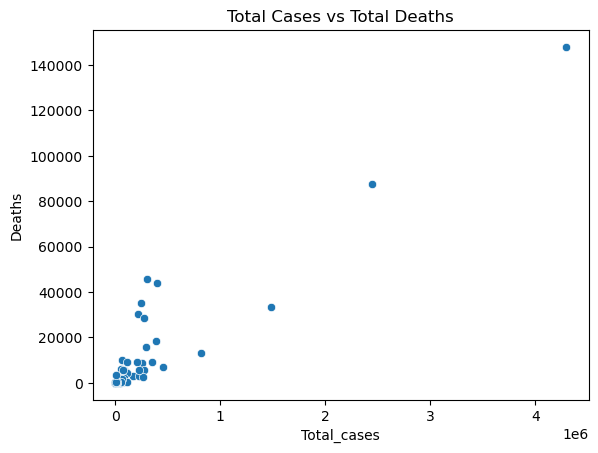

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=data,x="Total_cases",y="Deaths")
plt.xlabel("Total_cases")
plt.ylabel("Deaths")
plt.title("Total Cases vs Total Deaths")
plt.show()

In [159]:
data.to_csv("modified_covid_19.csv",index=False)